# Recommendation using embeddings and nearest neighbor search

In [1]:
import pandas as pd
import numpy as np

In [2]:
# DATASET_LINK="http://files.grouplens.org/datasets/movielens/ml-1m.zip"

In [3]:
# !wget -nc http://files.grouplens.org/datasets/movielens/ml-1m.zip
# !unzip -n ml-1m.zip

In [4]:
users = pd.read_csv(
    "ml-1m/users.dat",
    sep="::",
    names=["user_id", "sex", "age_group", "occupation", "zip_code"],
    encoding="ISO-8859-1",
    engine="python",
)

In [5]:
users.head()

,user_id,sex,age_group,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings = pd.read_csv(
    "ml-1m/ratings.dat",
    sep="::",
    names=["user_id", "movie_id", "rating", "unix_timestamp"],
    encoding="ISO-8859-1",
    engine="python",
)
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies = pd.read_csv(
    "ml-1m/movies.dat",
    sep="::",
    names=["movie_id", "title", "genres"],
    encoding="ISO-8859-1",
    engine="python",
)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies["combined"] = (
    "movie_id: " + movies.movie_id.astype(str)  + "; movie_title: " + movies.title.str.strip() + "; genres: " + movies.genres.str.strip()
)

In [9]:
movies.head()

,movie_id,title,genres,combined
0,1,Toy Story (1995),Animation|Children's|Comedy,movie_id: 1; movie_title: Toy Story (1995); ge...
1,2,Jumanji (1995),Adventure|Children's|Fantasy,movie_id: 2; movie_title: Jumanji (1995); genr...
2,3,Grumpier Old Men (1995),Comedy|Romance,movie_id: 3; movie_title: Grumpier Old Men (19...
3,4,Waiting to Exhale (1995),Comedy|Drama,movie_id: 4; movie_title: Waiting to Exhale (1...
4,5,Father of the Bride Part II (1995),Comedy,movie_id: 5; movie_title: Father of the Bride ...


### Movies 100k Data

In [13]:
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=['user_id','movie_id','rating','timestamp'])
movie_id_1k = dataset['movie_id'].unique()

In [15]:
movie_id_1k = dataset['movie_id'].unique()
df = movies[movies['movie_id'].isin(movie_id_1k)]

In [17]:
df

,movie_id,title,genres,combined
0,1,Toy Story (1995),Animation|Children's|Comedy,movie_id: 1; movie_title: Toy Story (1995); ge...
1,2,Jumanji (1995),Adventure|Children's|Fantasy,movie_id: 2; movie_title: Jumanji (1995); genr...
2,3,Grumpier Old Men (1995),Comedy|Romance,movie_id: 3; movie_title: Grumpier Old Men (19...
3,4,Waiting to Exhale (1995),Comedy|Drama,movie_id: 4; movie_title: Waiting to Exhale (1...
4,5,Father of the Bride Part II (1995),Comedy,movie_id: 5; movie_title: Father of the Bride ...
...,...,...,...,...
1632,1678,"Joy Luck Club, The (1993)",Drama,"movie_id: 1678; movie_title: Joy Luck Club, Th..."
1633,1679,Chairman of the Board (1998),Comedy,movie_id: 1679; movie_title: Chairman of the B...
1634,1680,Sliding Doors (1998),Drama|Romance,movie_id: 1680; movie_title: Sliding Doors (19...
1635,1681,Mortal Kombat: Annihilation (1997),Action|Adventure,movie_id: 1681; movie_title: Mortal Kombat: An...


In [42]:
import os
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key=openai.api_key)

In [43]:
from typing import List

def get_embedding(text: str, model="text-embedding-3-small") -> List[float]:
    # replace newlines, which can negatively affect performance.
    text = text.replace("\n", " ")
    response = client.embeddings.create(input=[text], model=model)
    return response.data[0].embedding

In [44]:
df.head(2)

,movie_id,title,genres,combined
0,1,Toy Story (1995),Animation|Children's|Comedy,movie_id: 1; movie_title: Toy Story (1995); ge...
1,2,Jumanji (1995),Adventure|Children's|Fantasy,movie_id: 2; movie_title: Jumanji (1995); genr...


In [45]:
encoding = tiktoken.get_encoding(embedding_encoding)

df["embedding"] = df.combined.apply(lambda x: get_embedding(x, model=embedding_model))

/var/folders/7x/tfwsytqd3yjccjl53cm75j700000gn/T/ipykernel_12301/2237851020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["embedding"] = df.combined.apply(lambda x: get_embedding(x, model=embedding_model))


In [46]:
# df.to_pickle("movielens_with_embedding.pickle")

In [47]:
df.to_csv("movielens_with_embedding.csv")

### Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
df = pd.read_csv("movielens_with_embedding.csv")
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)

In [3]:
matrix = np.vstack(df.embedding.values)
matrix.shape

(1637, 1536)

In [4]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42, n_init=10)
kmeans.fit(matrix)
df["cluster"] = kmeans.labels_

In [5]:
df["cluster"].value_counts()

cluster
2    360
4    267
3    201
7    166
1    151
6    141
8    122
5     84
9     82
0     63
Name: count, dtype: int64

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

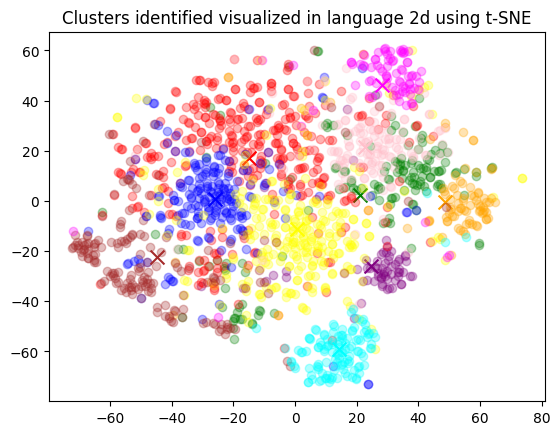

In [7]:
tsne = TSNE(
    n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200
)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue", "yellow", "orange", "pink", "brown", "cyan", "magenta"]):
    xs = np.array(x)[df.cluster == category]
    ys = np.array(y)[df.cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [8]:
import os
from openai import OpenAI
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
openai_api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key=openai_api_key)

In [11]:
movies_per_cluster = 5
COMPLETIONS_MODEL = "gpt-3.5-turbo"

for i in range(n_clusters):
    print(f"Cluster {i} Genres:\n")

    movies = "\n".join(
        df[df.cluster == i]
        .combined
        .sample(movies_per_cluster , random_state=42)
        .values
    )
    response = client.chat.completions.create(
        model=COMPLETIONS_MODEL,
        messages=[
            {"role": "user",
             "content": f'''We want to group these movies into meaningful clusters. 
                What do the following movies have in common?\n\nMovies:\n"""\n{movies}\n"""\n\nGenres:'''}
        ],
        temperature=0,
        max_tokens=100,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
    )
    print(response.choices[0].message.content.replace("\n", ""))
    print("\n")
    sample_cluster_rows = df[df.cluster == i].sample(movies_per_cluster, random_state=42)
    for j in range(movies_per_cluster):
        print(sample_cluster_rows.title.values[j], end=", ")
        print(sample_cluster_rows.genres.values[j], end="\n")

    print("-" * 100)
    print("\n")

Cluster 0 Genres:

All of the movies listed are documentaries.


Year of the Horse (1997), Documentary
Fire on the Mountain (1996), Documentary
Across the Sea of Time (1995), Documentary
When We Were Kings (1996), Documentary
Jupiter's Wife (1994), Documentary
----------------------------------------------------------------------------------------------------


Cluster 1 Genres:

The common theme among these movies is that they all fall under the genres of Action and Adventure. Some of them also have elements of Thriller and Mystery.


Mission: Impossible (1996), Action|Adventure|Mystery
Crimson Tide (1995), Drama|Thriller|War
Quest, The (1996), Action|Adventure
Substitute, The (1996), Action
Air Force One (1997), Action|Thriller
----------------------------------------------------------------------------------------------------


Cluster 2 Genres:

All of the movies listed have the genre "Drama" in common.


Robin Hood: Prince of Thieves (1991), Drama
Scarlet Letter, The (1995), Drama

### Recommend similar movies based on embeddings

To find similar articles, let's follow a three-step plan:
1. Get the similarity embeddings of all the movies
2. Calculate the distance between a source movie query and all other movies
3. Print out the movies closest to the source movie query within the clusters

In [18]:
# print the title, description, and label of each example
n_examples=1
for idx, row in df.head(n_examples).iterrows():
    print("")
    print(f"Title: {row['title']}")
    print(f"Genres: {row['genres']}")
    print(f"Cluster: {row['cluster']}")


Title: Toy Story (1995)
Genres: Animation|Children's|Comedy
Cluster: 8

Title: Jumanji (1995)
Genres: Adventure|Children's|Fantasy
Cluster: 8

Title: Grumpier Old Men (1995)
Genres: Comedy|Romance
Cluster: 3

Title: Waiting to Exhale (1995)
Genres: Comedy|Drama
Cluster: 2

Title: Father of the Bride Part II (1995)
Genres: Comedy
Cluster: 4


In [19]:
from typing import List

def get_embedding(text: str, model="text-embedding-3-small") -> List[float]:


Let's check that it works by getting an embedding.

### 4. Recommend similar articles based on embeddings

To find similar articles, let's follow a three-step plan:
1. Get the similarity embeddings of all the article descriptions
2. Calculate the distance between a source title and all other articles
3. Print out the other articles closest to the source title

In [6]:
def print_recommendations_from_strings(
    query: list[str],
    index_of_source_string: int,
    k_nearest_neighbors: int = 1,
    model="text-embedding-3-small",
) -> list[int]:
    query_embedding = get_embedding(query)

    response = client.embeddings.create(input=[query], model=model)
    query_embedding response.data[0].embedding

    df["similarity"] = df["embedding"].map(lambda x: cosine_similarity(np.array(x).reshape(1, -1), np.array(query_embedding).reshape(1, -1))[0][0])
    df = df.sort_values(by="similarity", ascending=False)
    
    indices_of_nearest_neighbors = indices_of_nearest_neighbors_from_distances(distances)

    # print out source string
    query_string = strings[index_of_source_string]
    print(f"Source string: {query_string}")
    # print out its k nearest neighbors
    k_counter = 0
    for i in indices_of_nearest_neighbors:
        # skip any strings that are identical matches to the starting string
        if query_string == strings[i]:
            continue
        # stop after printing out k articles
        if k_counter >= k_nearest_neighbors:
            break
        k_counter += 1

        # print out the similar strings and their distances
        print(
            f"""
        --- Recommendation #{k_counter} (nearest neighbor {k_counter} of {k_nearest_neighbors}) ---
        String: {strings[i]}
        Distance: {distances[i]:0.3f}"""
        )

    return indices_of_nearest_neighbors


### 5. Example recommendations

Let's look for articles similar to first one, which was about Tony Blair.

In [7]:
article_descriptions = df["description"].tolist()

tony_blair_articles = print_recommendations_from_strings(
    strings=article_descriptions,  # let's base similarity off of the article description
    index_of_source_string=0,  # let's look at articles similar to the first one about Tony Blair
    k_nearest_neighbors=5,  # let's look at the 5 most similar articles
)


Source string: BRITAIN: BLAIR WARNS OF CLIMATE THREAT Prime Minister Tony Blair urged the international community to consider global warming a dire threat and agree on a plan of action to curb the  quot;alarming quot; growth of greenhouse gases.

        --- Recommendation #1 (nearest neighbor 1 of 5) ---
        String: THE re-election of British Prime Minister Tony Blair would be seen as an endorsement of the military action in Iraq, Prime Minister John Howard said today.
        Distance: 0.153

        --- Recommendation #2 (nearest neighbor 2 of 5) ---
        String: LONDON, England -- A US scientist is reported to have observed a surprising jump in the amount of carbon dioxide, the main greenhouse gas.
        Distance: 0.160

        --- Recommendation #3 (nearest neighbor 3 of 5) ---
        String: The anguish of hostage Kenneth Bigley in Iraq hangs over Prime Minister Tony Blair today as he faces the twin test of a local election and a debate by his Labour Party about the di

Pretty good! 4 of the 5 recommendations explicitly mention Tony Blair and the fifth is an article from London about climate change, topics that might be often associated with Tony Blair.

Let's see how our recommender does on the second example article about NVIDIA's new chipset with more security.

In [8]:
chipset_security_articles = print_recommendations_from_strings(
    strings=article_descriptions,  # let's base similarity off of the article description
    index_of_source_string=1,  # let's look at articles similar to the second one about a more secure chipset
    k_nearest_neighbors=5,  # let's look at the 5 most similar articles
)


Source string: PC World - Upcoming chip set will include built-in security features for your PC.

        --- Recommendation #1 (nearest neighbor 1 of 5) ---
        String: PC World - Updated antivirus software for businesses adds intrusion prevention features.
        Distance: 0.112

        --- Recommendation #2 (nearest neighbor 2 of 5) ---
        String: PC World - The one-time World Class Product of the Year PDA gets a much-needed upgrade.
        Distance: 0.145

        --- Recommendation #3 (nearest neighbor 3 of 5) ---
        String: PC World - Send your video throughout your house--wirelessly--with new gateways and media adapters.
        Distance: 0.153

        --- Recommendation #4 (nearest neighbor 4 of 5) ---
        String: PC World - Symantec, McAfee hope raising virus-definition fees will move users to\  suites.
        Distance: 0.157

        --- Recommendation #5 (nearest neighbor 5 of 5) ---
        String: Gateway computers will be more widely available at Of

From the printed distances, you can see that the #1 recommendation is much closer than all the others (0.11 vs 0.14+). And the #1 recommendation looks very similar to the starting article - it's another article from PC World about increasing computer security. Pretty good! 

## Appendix: Using embeddings in more sophisticated recommenders

A more sophisticated way to build a recommender system is to train a machine learning model that takes in tens or hundreds of signals, such as item popularity or user click data. Even in this system, embeddings can be a very useful signal into the recommender, especially for items that are being 'cold started' with no user data yet (e.g., a brand new product added to the catalog without any clicks yet).

## Appendix: Using embeddings to visualize similar articles

To get a sense of what our nearest neighbor recommender is doing, let's visualize the article embeddings. Although we can't plot the 2048 dimensions of each embedding vector, we can use techniques like [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) or [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) to compress the embeddings down into 2 or 3 dimensions, which we can chart.

Before visualizing the nearest neighbors, let's visualize all of the article descriptions using t-SNE. Note that t-SNE is not deterministic, meaning that results may vary from run to run.

In [9]:
# get embeddings for all article descriptions
embeddings = [embedding_from_string(string) for string in article_descriptions]
# compress the 2048-dimensional embeddings into 2 dimensions using t-SNE
tsne_components = tsne_components_from_embeddings(embeddings)
# get the article labels for coloring the chart
labels = df["label"].tolist()

chart_from_components(
    components=tsne_components,
    labels=labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="t-SNE components of article descriptions",
)


As you can see in the chart above, even the highly compressed embeddings do a good job of clustering article descriptions by category. And it's worth emphasizing: this clustering is done with no knowledge of the labels themselves!

Also, if you look closely at the most egregious outliers, they are often due to mislabeling rather than poor embedding. For example, the majority of the blue World points in the green Sports cluster appear to be Sports stories.

Next, let's recolor the points by whether they are a source article, its nearest neighbors, or other.

In [10]:
# create labels for the recommended articles
def nearest_neighbor_labels(
    list_of_indices: list[int],
    k_nearest_neighbors: int = 5
) -> list[str]:
    """Return a list of labels to color the k nearest neighbors."""
    labels = ["Other" for _ in list_of_indices]
    source_index = list_of_indices[0]
    labels[source_index] = "Source"
    for i in range(k_nearest_neighbors):
        nearest_neighbor_index = list_of_indices[i + 1]
        labels[nearest_neighbor_index] = f"Nearest neighbor (top {k_nearest_neighbors})"
    return labels


tony_blair_labels = nearest_neighbor_labels(tony_blair_articles, k_nearest_neighbors=5)
chipset_security_labels = nearest_neighbor_labels(chipset_security_articles, k_nearest_neighbors=5
)


In [11]:
# a 2D chart of nearest neighbors of the Tony Blair article
chart_from_components(
    components=tsne_components,
    labels=tony_blair_labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="Nearest neighbors of the Tony Blair article",
    category_orders={"label": ["Other", "Nearest neighbor (top 5)", "Source"]},
)


Looking at the 2D chart above, we can see that the articles about Tony Blair are somewhat close together inside of the World news cluster. Interestingly, although the 5 nearest neighbors (red) were closest in high dimensional space, they are not the closest points in this compressed 2D space. Compressing the embeddings down to 2 dimensions discards much of their information, and the nearest neighbors in the 2D space don't seem to be as relevant as those in the full embedding space.

In [12]:
# a 2D chart of nearest neighbors of the chipset security article
chart_from_components(
    components=tsne_components,
    labels=chipset_security_labels,
    strings=article_descriptions,
    width=600,
    height=500,
    title="Nearest neighbors of the chipset security article",
    category_orders={"label": ["Other", "Nearest neighbor (top 5)", "Source"]},
)


For the chipset security example, the 4 closest nearest neighbors in the full embedding space remain nearest neighbors in this compressed 2D visualization. The fifth is displayed as more distant, despite being closer in the full embedding space.

Should you want to, you can also make an interactive 3D plot of the embeddings with the function `chart_from_components_3D`. (Doing so will require recomputing the t-SNE components with `n_components=3`.)